# matplotlib.pyplot

## Overview

### Introduction: matplotlib and pyplot

Matplotlib[1] is a popular python package for data visualisation. Developed since 2003 [R] as a way of making plots in python using a matlab like syntax. It is currently maintained and actively developed by a large community of open source developers.

Matplotlib features an object oriented interface at the base of which is the `Figure` class. A `Figure` can contain any number of subplots which are reified as objects of the `Axes` class, which contains many of the methods and fields that define the plot. 

Matplotlib.pyplot is a procedural wrapper around Matplotlib's object-oriented interface. The Matplotlib documentation recommends that, with the exception of a few functions that simplify intitialisation and saving of figures (`pyplot.figure`, `pyplot.subplot`, `pyplot.subplots`, and `pyplot.savefig`), the object oriented interface be used when programming, and the stateful pyplot interface be reserved for interactive work [R].

### Importing matplotlib.pyplot

The canonical alias for `matplotlib.pyplot` is `plt` and it is therefore imported by convention as follows:


In [16]:
# import matplotlib.pyplot and assign alias 'plt'
import matplotlib.pyplot as plt

`plt.subplots` returns a `Figure` object and an `Axes` object. The `Figure` object is a conatiner for plots and the `Axes` object that is returned is the first plot in that container. `plt.sublots` takes two positional integer arguments, `nrows` and `ncols`. These parameters represent the number of subplots or `Axes` held in the `Figure` and their arrangement. The current figure can be accessed by calling `matplotlib.pyplot.gcf()` (gcf = GetCurrentFigure) and the current plot in that figure can be accessed by calling `matplotlib.pytplot.gcf().gca()` (gca = GetCurrentAxes).

### Quick plots using the procedural interface

### Using the OO interface for greater flexibility  

## matplotlib.pyplot example plots


### 1. Scatterplot of geographical data

Reference: scikit learn book

In [17]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Read ED centroid data into pandas dataframe
eds = pd.read_csv('data/ed_centroids.csv')
eds.head()

,X,Y,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,CSOED,OSIED,EDNAME,LAND_AREA,TOTAL_AREA
0,236368.456056,286670.682399,IE0,Ireland,IE01,"Border,Midland and Western",IE011,Border,32,Cavan County,32090,027053,Kilcogy,17.793398,17.838415
1,296984.205766,180513.893740,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01004,017022,Hacketstown,22.068904,22.068904
2,292582.032469,178524.343479,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01005,017023,Haroldstown,11.543112,11.543112
3,284014.641367,180190.200539,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01006,017029,Kineagh,18.033035,18.033035
4,286425.977882,183194.215360,IE0,Ireland,IE02,Southern and Eastern,IE024,South-East (IE),1,Carlow County,01007,017038,Rahill,16.431779,16.431779


In [19]:
# Rename ED ID column to make it easier to join with other data
eds['ID'] = eds['CSOED']
# Set the dataframe index to be the ED ID column
eds.set_index('ID', inplace=True)
# Cull unnecessary columns
eds = eds[['X', 'Y', 'LAND_AREA']]
# Check the data
eds.head()

,X,Y,LAND_AREA
ID,,,
32090,236368.456056,286670.682399,17.793398
01004,296984.205766,180513.893740,22.068904
01005,292582.032469,178524.343479,11.543112
01006,284014.641367,180190.200539,18.033035
01007,286425.977882,183194.215360,16.431779


Get data to join with ED centroids for scatterplot. Small Area Population Statistics from CSO website [R]

In [20]:
# 2016 SAPS
saps2016_url = 'https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS2016_ED3409.csv'

# 2016 Key
# https://www.cso.ie/en/media/csoie/census/census2016/census2016boundaryfiles/SAPS_2016_Glossary.xlsx

# 2011 SAPS
saps2011_url = 'https://www.cso.ie/en/media/csoie/census/documents/saps2011files/AllThemesTablesED.csv'

# 2011 Key
# https://www.cso.ie/en/media/csoie/census/documents/saps2011files/Theme,breakdown.xlsx

2016 SAPS csv file has an unusual encoding and produces errors when importing using pandas.read_csv(). This is avoided by specifying the encoding (cp1252) [R]. For the purposes of the present demonstration the statistic of interest is total population per ED. The correct column ('T1_1AGETT') is identified using the key linked to above [R]. The file also imports numeric columns as dtype('object') and inserts commas as thousand separators. This is corrected using `pandas.to_numeric` and `pandas.Series.str.replace()` [R]. The correctly formatted data is stored in a new column `Pop2016`.

In [21]:
# Download 2016 SAPS data at ED level and extract ID column and Total Population column
saps2016 = pd.read_csv(saps2016_url, encoding='cp1252', usecols=['GEOGID', 'T1_1AGETT'])
# Remove commas and cast Total Population column to numeric dtype. 
saps2016['Pop2016'] = pd.to_numeric(saps2016['T1_1AGETT'].str.replace(',', ''))
# Rename GEOGID column to ID and remove ED3409_ prefix
saps2016['ID'] = saps2016['GEOGID'].str.replace("ED3409_", "")
# Make ED ID column the index
saps2016.set_index('ID', inplace=True)
# Drop unneeded columns
saps2016 = saps2016.drop(['GEOGID', 'T1_1AGETT'], axis=1)
saps2016.head()


,Pop2016
ID,
01001,4560
01002,1405
01003,526
01004,1117
01005,296


In [22]:
# Download and clean up 2011 SAPS data
saps2011 = pd.read_csv(saps2011_url, usecols=['GEOGID', 'T1_1AGETT'])
saps2011['ID'] = saps2011['GEOGID'].str.replace('E', '')
saps2011.set_index('ID', inplace=True)
saps2011 = saps2011.drop(['GEOGID'], axis=1)
saps2011.rename(columns={'T1_1AGETT':'Pop2011'}, inplace=True)
saps2011.head()


,Pop2011
ID,
01001,4181
01002,1272
01003,560
01004,1091
01005,259


In [23]:
# Join the 2011 and 2016 population dataframes with ED centroids
pop = saps2016.join(saps2011.join(eds))
# Calculate population change between the two periods
pop['Pop Change'] = pop['Pop2016'] - pop['Pop2011']
# Create boolean column for whether the population change is positive or negative
pop['Up'] = pop['Pop Change'] > 0
# Calculate the percentage change
pop['Percent Change'] = (pop['Pop Change'] / pop['Pop2011']) * 100
pop.head()

,Pop2016,Pop2011,X,Y,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,
01001,4560,4181,272309.810746,176747.582960,1.807095,379,True,9.064817
01002,1405,1272,271535.112431,176812.764683,0.475506,133,True,10.455975
01003,526,560,295660.775229,176254.594475,28.136881,-34,False,-6.071429
01004,1117,1091,296984.205766,180513.893740,22.068904,26,True,2.383135
01005,296,259,292582.032469,178524.343479,11.543112,37,True,14.285714


No handles with labels found to put in legend.


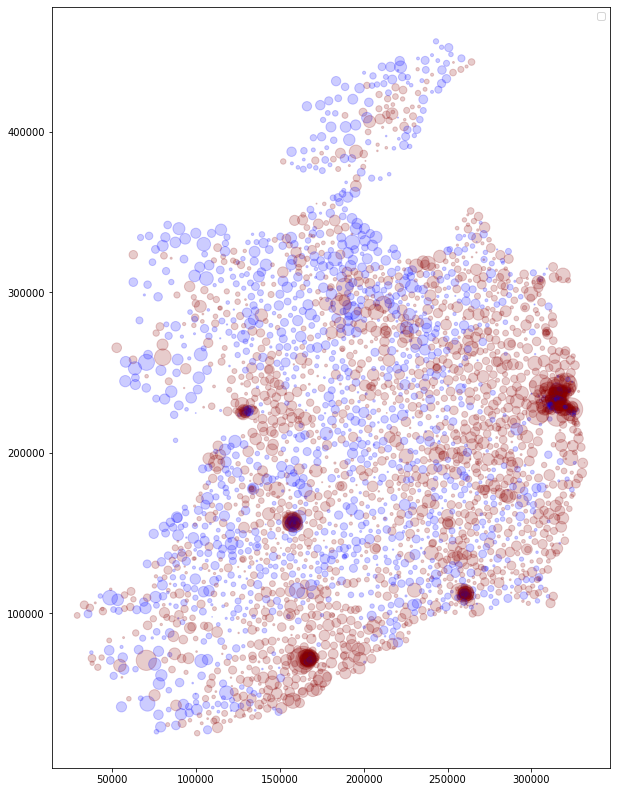

In [24]:
# Create scatterplot with long and lat values of centroids on X and Y axes
# and direction of pop change as colour 
# and size of symbol as size of pop change
plt.figure(figsize=(10, 14))
plt.scatter(x=pop['X'], y=pop['Y'], alpha=0.2, c=np.where(pop['Up'], 'darkred', 'blue'), s=abs(pop['Percent Change'] * 10))
plt.legend()
plt.show()

There's a lot of confusion in high density areas with many small EDs, i.e. in the urban centres of Dublin, Cork, Limerick, Galway, and Waterford. Changing the drawing order might hepl to remedy that. The drawing order can be changed simply by changing the order of values in the DataFrame.

In [37]:
sorted_pop = pop.sort_values(by='Percent Change', key=abs, ascending=False)
sorted_pop.head()

,Pop2016,Pop2011,X,Y,LAND_AREA,Pop Change,Up,Percent Change
ID,,,,,,,,
18078,364,217,162593.506203,69924.028146,1.381605,147,True,67.741935
17006,2223,1326,164065.756407,71164.975483,1.579302,897,True,67.647059
04005,3113,1966,320062.137892,242239.885538,10.378176,1147,True,58.341811
04015,3257,2112,305723.025825,241432.087409,3.929437,1145,True,54.214015
05049,2886,1884,323703.272575,227091.949056,0.611499,1002,True,53.184713


The population DataFrame is now sorted by absolute population change so the largest symbols will be drawn first and the smaller ones later. This gives a better idea of whts going on in dense areas.

No handles with labels found to put in legend.


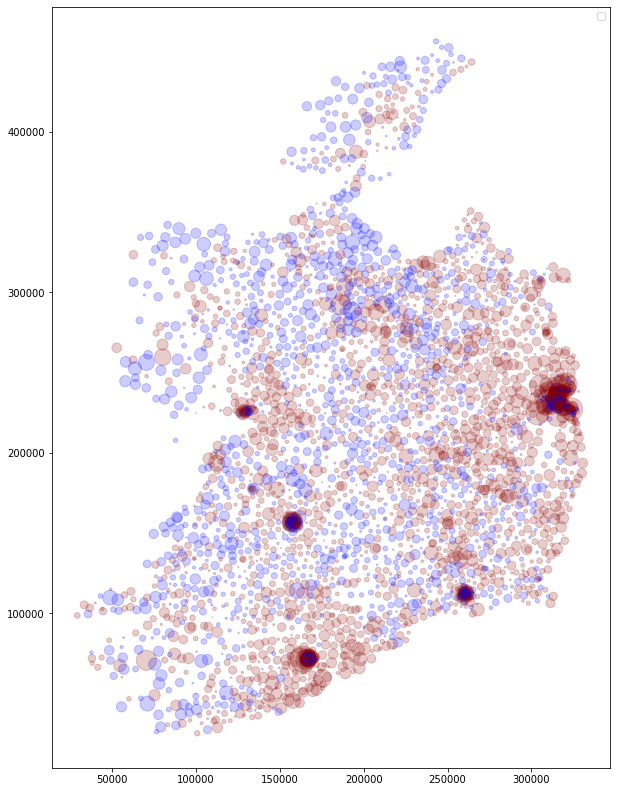

In [38]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 14))
plt.scatter(x=sorted_pop['X'], y=sorted_pop['Y'], alpha=0.2, c=np.where(sorted_pop['Up'], 'darkred', 'blue'), s=abs(sorted_pop['Percent Change'] * 10))
plt.legend()
plt.show()

So far the plots are showing percent population change. It would be interesting to see absolute change.

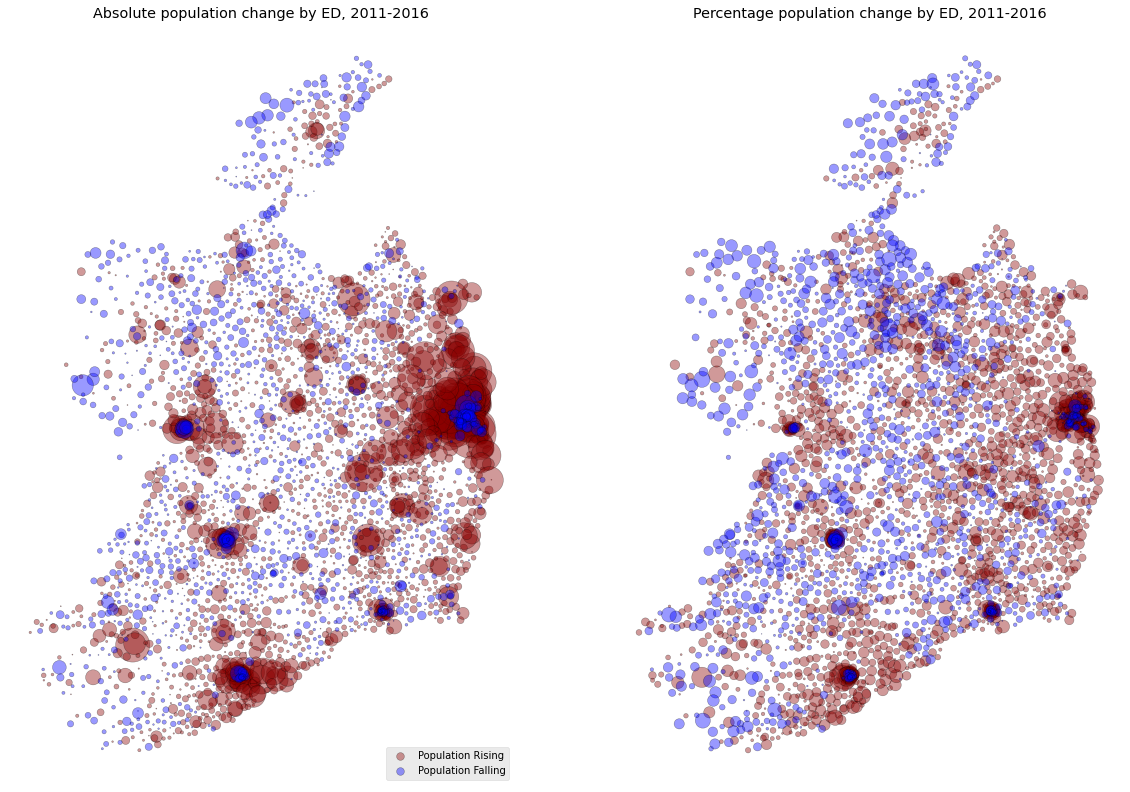

In [46]:
plt.rcParams["figure.figsize"] = [20,14]
#plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(1, 2)
for rising in [True, False]:
    label = "Population Rising" if rising else "Population Falling"
    colour = 'darkred' if rising else 'blue'
    x = pop[pop['Up'] == rising]['X']
    y = pop[pop['Up'] == rising]['Y']
    scale1 = abs(pop[pop['Up'] == rising]['Pop Change'])
    scale2 = abs(pop[pop['Up'] == rising]['Percent Change'] * 10)
    ax1.scatter(x=x, y=y, c=colour, s=scale1, label=label,
               alpha=0.4, edgecolors='black')

    ax2.scatter(x=x, y=y, c=colour, s=scale2, label=label,
               alpha=0.4, edgecolors='black')

    ax1.axis('off')
    ax2.axis('off')

    ax1.set_title('Absolute population change by ED, 2011-2016')
    ax2.set_title('Percentage population change by ED, 2011-2016')

lgd = ax1.legend(loc='lower right')

# Set legend symbol sizes: https://stackoverflow.com/a/43578952
for handle in lgd.legendHandles:
    handle.set_sizes([60])


plt.show()

### 2. Scatterplot matrix

### 3. Bubble plot using geographic data

***

## References

[1] Matplotlib Development Team. (2021). Matplotlib: Visualization with Python. [online] Available from: <https://matplotlib.org/> Accessed: 28th September, 2021

[3] Matplotlib module docstring